In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from cw2 import sorted_barplot

data = sio.loadmat('tennis_data.mat')

W = data['W']
for i, player in enumerate(W):
    W[i] = player[0]
    
G = data['G'] - 1

# Number of players
M = W.shape[0]

# Number of Games
N = G.shape[0]

print('M =', M)
print('N =', N)

# -----------------------------------------

names = ['Novak-Djokovic', 'Rafael-Nadal', 'Roger-Federer', 'Andy-Murray']
ATP_top_players = []

for name in names:
    index = np.where(W == name)[0][0]
    ATP_top_players.append(index)

print(ATP_top_players)

M = 107
N = 1801
[15, 0, 4, 10]


In [2]:
'''
# %matplotlib notebook
%matplotlib inline

nums_games = []

# p = 15
# p = 0
for p in range(M):
    games_won = np.where(G[:, 0] == p)[0]
    games_lost = np.where(G[:, 1] == p)[0]
    nums_games.append(games_won.shape[0] + games_lost.shape[0])    # no of games played by player p.

nums_games = np.array(nums_games)
    
# W[np.argsort(nums_games)]
# nums_games[np.argsort(nums_games)]

from cw2 import sorted_barplot
sorted_barplot(nums_games, W, 'number of games played')

nums_games[15]
'''
None

#### ^ From the bar plot above, the largest number of games played by a player is only 74, while the total number of games is 1801. This translates to each player has only at most 4.1% of the total games. This justifies the use of uncorrelatedness between two players' skills, even though two players having played the same game will introduce some correlatedness into their skills.

## c.1) MP: table of probabilities that a player's skill is higher than the other.

In [3]:
mean_skills_iters = np.load('b_result/mean_skills_iters.npy')
skill_precisions_iters = np.load('b_result/precisions_iters.npy')

In [4]:
final_mean_skills = mean_skills_iters[:,-1]
final_skill_variances = 1./skill_precisions_iters[:,-1]
# final_skill_variances

In [5]:
# Wrong method for calculating prob of higher skill
'''
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def norm_intercept(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

m1 = 2.5
std1 = 1.0
m2 = 5.0
std2 = 2.0

result = norm_intercept(m1,m2,std1,std2)

x = np.linspace(-5,9,10000)
plt.plot(x,norm.pdf(x,m1,std1))
plt.plot(x,norm.pdf(x,m2,std2))
plt.plot(result,norm.pdf(result,m1,std1),'o')
'''
None

### With the skills of two players assumed to be uncorrelated, the Gaussian pdf of their skill difference can be calculated from the Gaussian of each of their skills.

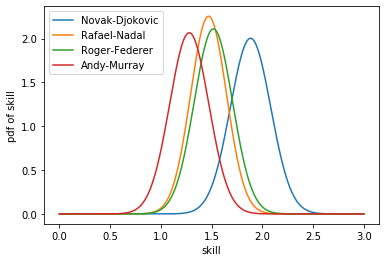

In [6]:
# Guassian of each ATP top players

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# for p in range(M):
for p in ATP_top_players:

    mean = final_mean_skills[p]
    std = np.sqrt(final_skill_variances[p])
    
    x = np.linspace(0,3,10000)
#     x = np.linspace(-5,+5,10000)
#     plt.plot(x,norm.pdf(x,mean,std))
    plt.plot(x,norm.pdf(x,mean,std), label = W[p][0])

plt.legend()
plt.xlabel('skill')
plt.ylabel('pdf of skill')

plt.savefig('b_result/b_result_MP_skills')

In [7]:
# mean and variance of the skill difference

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# print(norm.cdf(0))
# print(norm.pdf(0))

# p1s = np.concatenate([ [ATP_top_players[0]]*3, [ATP_top_players[1]]*2, [ATP_top_players[2]]*1 ])
# p2s = np.concatenate([ATP_top_players[1:], ATP_top_players[2:], ATP_top_players[3:]])

player_pairs = [(15,0), (15,4), (15,10), (0,4), (0,10), (4,10)]

new_means = []
new_vars = []

for p1, p2 in player_pairs:
    print(p1,p2)

    mean1 = final_mean_skills[p1]
    mean2 = final_mean_skills[p2]

    var1 = final_skill_variances[p1]
    var2 = final_skill_variances[p2]

    new_mean = mean1 - mean2
    new_var = var1 + var2
    
    new_means.append(new_mean)
    new_vars.append(new_var)

print(new_means)
print(new_vars)

15 0
15 4
15 10
0 4
0 10
4 10
[0.413812791168092, 0.3662618139379379, 0.6042920024692797, -0.04755097723015411, 0.19047921130118772, 0.23803018853134184]
[0.07096742200555456, 0.07538895621067737, 0.0769357026765476, 0.06704213212744839, 0.06858887859331861, 0.07301041279844142]


In [8]:
# Compute the probabilities of higher skills.

probs_higher_skill = []

for c in range(len(player_pairs)):
    player_pair = player_pairs[c]
    new_mean = new_means[c]
    new_var = new_vars[c]

    probs_higher_skill.append( 1 - norm.cdf(0, new_mean, np.sqrt(new_var)) )

probs_higher_skill

[0.9398323962860353,
 0.9088889849969894,
 0.985320306127701,
 0.42714491280738276,
 0.7664825653540128,
 0.8108211786227342]

D:\Anaconda3\Lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


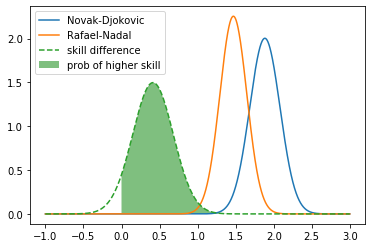

In [9]:
c = 0

player_pair = player_pairs[c]
p1 = player_pair[0]
p2 = player_pair[1]

mean1 = final_mean_skills[p1]
mean2 = final_mean_skills[p2]

var1 = final_skill_variances[p1]
var2 = final_skill_variances[p2]

new_mean = new_means[c]
new_var = new_vars[c]

x = np.linspace(-1,3,10000)
plt.plot(x,norm.pdf(x,mean1,np.sqrt(var1)), label = W[p1][0])
plt.plot(x,norm.pdf(x,mean2,np.sqrt(var2)), label = W[p2][0])

ax = plt.axes()
plt.plot(x,norm.pdf(x,new_mean,np.sqrt(new_var)), '--', label = 'skill difference')

# y = np.ma.masked_less(norm.pdf(x,new_mean,np.sqrt(new_var)), 0)
ax.fill_between(x, norm.pdf(x,new_mean,np.sqrt(new_var)), where= x>=0,\
                alpha=0.5, facecolor='green', interpolate=True,\
                label='prob of higher skill')

plt.legend()
# plt.savefig('c_result/c_result_higher_skill_demo.jpg')

## c.2) MP: table of probabilities that a player wins the match with the other player.

In [10]:
final_mean_skills.shape

(107,)

In [11]:
final_skill_variances.shape

(107,)

In [12]:
# mean and variance of the skill difference

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# print(norm.cdf(0))
# print(norm.pdf(0))

# p1s = np.concatenate([ [ATP_top_players[0]]*3, [ATP_top_players[1]]*2, [ATP_top_players[2]]*1 ])
# p2s = np.concatenate([ATP_top_players[1:], ATP_top_players[2:], ATP_top_players[3:]])

player_pairs = [(15,0), (15,4), (15,10), (0,4), (0,10), (4,10)]

new_means_n = []
new_vars_n = []

noise_mean = 0
noise_var = 1


for c in range(len(player_pairs)):

    new_mean_n = new_means[c]
    new_var_n = new_vars[c] + noise_var
    
    new_means_n.append(new_mean_n)
    new_vars_n.append(new_var_n)

print('means and variances of (skill difference + noise =) game outcomes')
print(new_means_n)
print(new_vars_n)

means and variances of (skill difference + noise =) game outcomes
[0.413812791168092, 0.3662618139379379, 0.6042920024692797, -0.04755097723015411, 0.19047921130118772, 0.23803018853134184]
[1.0709674220055545, 1.0753889562106773, 1.0769357026765476, 1.0670421321274484, 1.0685888785933186, 1.0730104127984414]


In [13]:
probs_win = []

for c in range(len(player_pairs)):
#     player_pair = player_pairs[c]
    new_mean_n = new_means_n[c]
    new_var_n = new_vars_n[c]

    probs_win.append( 1 - norm.cdf(0, new_mean_n, np.sqrt(new_var_n)) )

probs_win

[0.6553728337379876,
 0.6380271372143567,
 0.719820020989274,
 0.4816419998270708,
 0.5730971165792581,
 0.5908723057300087]

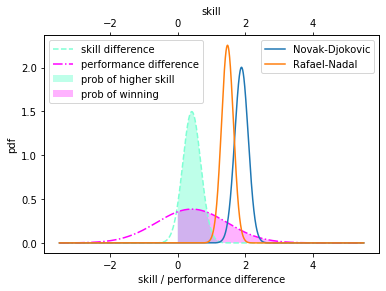

In [42]:
import matplotlib.colors as mcolors

c = 0

player_pair = player_pairs[c]
p1 = player_pair[0]
p2 = player_pair[1]

mean1 = final_mean_skills[p1]
mean2 = final_mean_skills[p2]

var1 = final_skill_variances[p1]
var2 = final_skill_variances[p2]

new_mean = new_means[c]
new_var = new_vars[c]

new_mean_n = new_means_n[c]
new_var_n = new_vars_n[c]

x = np.linspace(-3.5,5.5,10000)


# ax2 = ax1.twiny()
ax2 = plt.axes()
plt.plot(x,norm.pdf(x,new_mean,np.sqrt(new_var)), '--', color='aquamarine', label = 'skill difference')

# y = np.ma.masked_less(norm.pdf(x,new_mean,np.sqrt(new_var)), 0)
ax2.fill_between(x, norm.pdf(x,new_mean,np.sqrt(new_var)), where= x>=0,\
                alpha=0.5, facecolor='aquamarine', interpolate=True,\
                label='prob of higher skill')


plt.plot(x,norm.pdf(x,new_mean_n,np.sqrt(new_var_n)), '-.', color='magenta', label = 'performance difference')
ax2.fill_between(x, norm.pdf(x,new_mean_n,np.sqrt(new_var_n)), where= x>=0,\
                alpha=0.3, facecolor='magenta', interpolate=True,\
                label='prob of winning')

plt.legend(loc=2)
plt.xlabel('skill / performance difference')
plt.ylabel('pdf')

ax1 = ax2.twiny()
plt.plot(x,norm.pdf(x,mean1,np.sqrt(var1)), label = W[p1][0])
plt.plot(x,norm.pdf(x,mean2,np.sqrt(var2)), label = W[p2][0])


plt.legend(loc=1)
plt.xlabel('skill')

plt.savefig('c_result/c_higher_skill_winning_demo.jpg')




# ax1 = fig.add_subplot(111)
# ax2 = ax1.twiny()

# X = np.linspace(0,1,1000)
# Y = np.cos(X*20)

# ax1.plot(X,Y)
# ax1.set_xlabel(r"Original x-axis: $X$")

# new_tick_locations = np.array([.2, .5, .9])

# def tick_function(X):
#     V = 1/(1+X)
#     return ["%.3f" % z for z in V]

# ax2.set_xlim(ax1.get_xlim())
# ax2.set_xticks(new_tick_locations)
# ax2.set_xticklabels(tick_function(new_tick_locations))
# ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")